In [47]:
# Base import and functions

import imutils
import cv2
from imutils import contours
import os, os.path

from tqdm import tqdm

import pytesseract             # Python interface to tesseract for OCR

import numpy as np
from PIL import Image

from skimage.color import rgb2gray
from skimage.exposure import equalize_adapthist, adjust_log
from skimage.restoration import denoise_tv_chambolle, denoise_wavelet, denoise_bilateral
from skimage.filters import threshold_niblack
from skimage.util import img_as_float, img_as_ubyte, img_as_uint
from skimage.morphology import reconstruction

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%load_ext line_profiler

import skimage
print("skimage: " + skimage.__version__)  # Must be greater then 0.14 for Chain Vesa

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
skimage: 0.14dev


# Morfology

/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/util/dtype.py:123: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/util/dtype.py:123: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


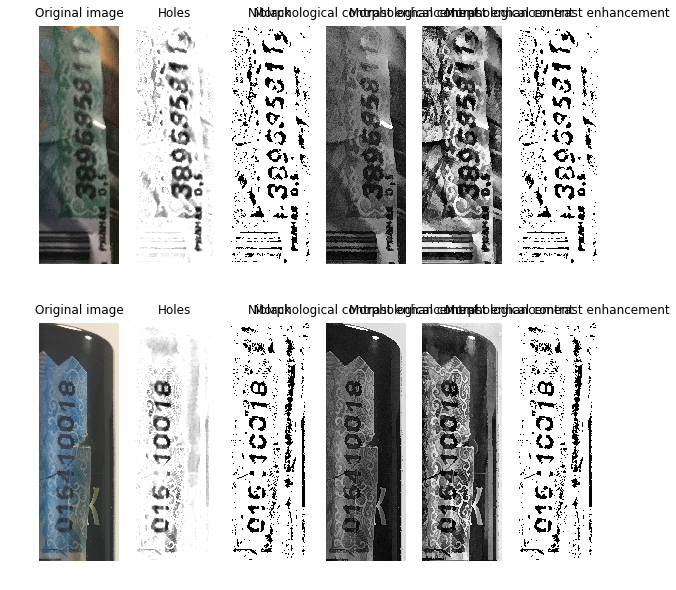

In [14]:
from skimage.filters.rank import enhance_contrast
from skimage.morphology import disk
from skimage import img_as_ubyte

src = Image.open('data/premasked/IMG_0676.JPG')
src2 = Image.open('data/premasked/IMG_0549.JPG')
# src = Image.open('data/premasked/IMG_0560.JPG')
# src = Image.open('data/premasked/IMG_0562.JPG')
# src = Image.open('data/premasked/IMG_0595.JPG')

# First source
image = src.rotate(-90, expand=True).crop((1276, 78, 1276+392, 78+1166))
width = image.size[0]
height = image.size[1]

img = img_as_float(image)
logarithmic_corrected = adjust_log(img, 1)
img_log_clah = equalize_adapthist(logarithmic_corrected, clip_limit=0.03)
denoised = denoise_tv_chambolle(img_log_clah, weight=0.1, multichannel=True)
denoised_g = rgb2gray(denoised)

seed = np.copy(denoised_g)
seed[1:-1, 1:-1] = denoised_g.max()
mask = denoised_g

filled = reconstruction(seed, mask, method='erosion')
holes = denoised_g-filled
niblack = holes > threshold_niblack(holes, window_size=91, k=0.9)

# Secong source
image2 = src2.rotate(-90, expand=True).crop((1276, 78, 1276+392, 78+1166))
width = image2.size[0]
height = image2.size[1]

img = img_as_float(image2)
logarithmic_corrected = adjust_log(img, 1)
img_log_clah = equalize_adapthist(logarithmic_corrected, clip_limit=0.03)
denoised = denoise_tv_chambolle(img_log_clah, weight=0.1, multichannel=True)
denoised_g2 = rgb2gray(denoised)

seed = np.copy(denoised_g2)
seed[1:-1, 1:-1] = denoised_g2.max()
mask = denoised_g2

filled2 = reconstruction(seed, mask, method='erosion')
holes2 = denoised_g2-filled2
niblack2 = holes2 > threshold_niblack(holes2, window_size=91, k=0.9)

fig, ax = plt.subplots(2, 6, figsize=(10, 10), sharex=True, sharey=True)
ax = ax.ravel()

ax[0].imshow(image)
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(holes, cmap='gray')
ax[1].set_title('Holes')
ax[1].axis('off')

ax[2].imshow(niblack, cmap='gray')
ax[2].set_title('Niblack')
ax[2].axis('off')

ax[3].imshow(enhance_contrast(rgb2gray(img_as_ubyte(image)), disk(5)), cmap='gray')
ax[3].set_title('Morphological contrast enhancement')
ax[3].axis('off')

ax[4].imshow(enhance_contrast(denoised_g, disk(5)), cmap='gray')
ax[4].set_title('Morphological contrast enhancement')
ax[4].axis('off')

ax[5].imshow(enhance_contrast(niblack, disk(5)), cmap='gray')
ax[5].set_title('Morphological contrast enhancement')
ax[5].axis('off')

ax[6].imshow(image2)
ax[6].set_title('Original image')
ax[6].axis('off')

ax[7].imshow(holes2, cmap='gray')
ax[7].set_title('Holes')
ax[7].axis('off')

ax[8].imshow(niblack2, cmap='gray')
ax[8].set_title('Niblack')
ax[8].axis('off')

ax[9].imshow(enhance_contrast(rgb2gray(img_as_ubyte(image2)), disk(5)), cmap='gray')
ax[9].set_title('Morphological contrast enhancement')
ax[9].axis('off')

ax[10].imshow(enhance_contrast(denoised_g2, disk(5)), cmap='gray')
ax[10].set_title('Morphological contrast enhancement')
ax[10].axis('off')

ax[11].imshow(enhance_contrast(niblack2, disk(5)), cmap='gray')
ax[11].set_title('Morphological contrast enhancement')
ax[11].axis('off')

plt.show()

/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/util/dtype.py:123: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/util/dtype.py:123: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


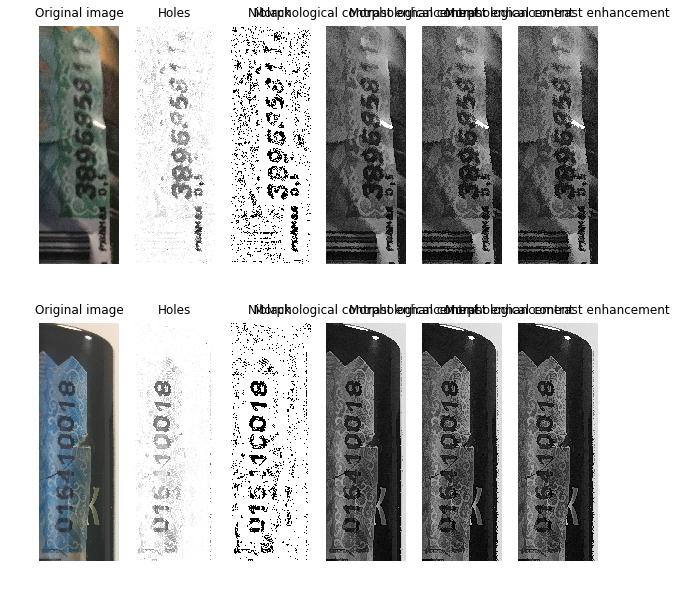

In [11]:
from skimage.filters.rank import enhance_contrast
from skimage.morphology import disk
from skimage import img_as_ubyte

src = Image.open('data/premasked/IMG_0676.JPG')
src2 = Image.open('data/premasked/IMG_0549.JPG')
# src = Image.open('data/premasked/IMG_0560.JPG')
# src = Image.open('data/premasked/IMG_0562.JPG')
# src = Image.open('data/premasked/IMG_0595.JPG')

# First source
image = src.rotate(-90, expand=True).crop((1276, 78, 1276+392, 78+1166))
width = image.size[0]
height = image.size[1]

img = img_as_float(image)
logarithmic_corrected = adjust_log(img, 1)
img_log_clah = equalize_adapthist(logarithmic_corrected, clip_limit=0.03)
denoised = denoise_tv_chambolle(img_log_clah, weight=0.1, multichannel=True)
denoised_g = enhance_contrast(rgb2gray(img_as_ubyte(image)), disk(3))

seed = np.copy(denoised_g)
seed[1:-1, 1:-1] = denoised_g.max()
mask = denoised_g

filled = reconstruction(seed, mask, method='erosion')
holes = denoised_g-filled
niblack = holes > threshold_niblack(holes, window_size=91, k=0.9)

# Secong source
image2 = src2.rotate(-90, expand=True).crop((1276, 78, 1276+392, 78+1166))
width = image2.size[0]
height = image2.size[1]

img = img_as_float(image2)
logarithmic_corrected = adjust_log(img, 1)
img_log_clah = equalize_adapthist(logarithmic_corrected, clip_limit=0.03)
denoised = denoise_tv_chambolle(img_log_clah, weight=0.1, multichannel=True)
denoised_g2 = enhance_contrast(rgb2gray(img_as_ubyte(image2)), disk(3))

seed = np.copy(denoised_g2)
seed[1:-1, 1:-1] = denoised_g2.max()
mask = denoised_g2

filled2 = reconstruction(seed, mask, method='erosion')
holes2 = denoised_g2-filled2
niblack2 = holes2 > threshold_niblack(holes2, window_size=91, k=0.9)

fig, ax = plt.subplots(2, 6, figsize=(10, 10), sharex=True, sharey=True)
ax = ax.ravel()

ax[0].imshow(image)
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(holes, cmap='gray')
ax[1].set_title('Holes')
ax[1].axis('off')

ax[2].imshow(niblack, cmap='gray')
ax[2].set_title('Niblack')
ax[2].axis('off')

ax[3].imshow(enhance_contrast(rgb2gray(img_as_ubyte(image)), disk(5)), cmap='gray')
ax[3].set_title('Morphological contrast enhancement')
ax[3].axis('off')

ax[4].imshow(enhance_contrast(denoised_g, disk(5)), cmap='gray')
ax[4].set_title('Morphological contrast enhancement')
ax[4].axis('off')

ax[5].imshow(enhance_contrast(denoised_g, disk(5)), cmap='gray')
ax[5].set_title('Morphological contrast enhancement')
ax[5].axis('off')

ax[6].imshow(image2)
ax[6].set_title('Original image')
ax[6].axis('off')

ax[7].imshow(holes2, cmap='gray')
ax[7].set_title('Holes')
ax[7].axis('off')

ax[8].imshow(niblack2, cmap='gray')
ax[8].set_title('Niblack')
ax[8].axis('off')

ax[9].imshow(enhance_contrast(rgb2gray(img_as_ubyte(image2)), disk(5)), cmap='gray')
ax[9].set_title('Morphological contrast enhancement')
ax[9].axis('off')

ax[10].imshow(enhance_contrast(denoised_g2, disk(5)), cmap='gray')
ax[10].set_title('Morphological contrast enhancement')
ax[10].axis('off')

ax[11].imshow(enhance_contrast(denoised_g2, disk(5)), cmap='gray')
ax[11].set_title('Morphological contrast enhancement')
ax[11].axis('off')

plt.show()

/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/util/dtype.py:123: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/util/dtype.py:123: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/util/dtype.py:123: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


CPU times: user 156 ms, sys: 0 ns, total: 156 ms
Wall time: 155 ms


/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/morphology/misc.py:203: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  "Did you mean to use a boolean array?", UserWarning)
/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/util/dtype.py:123: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/util/dtype.py:123: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


CPU times: user 155 ms, sys: 0 ns, total: 155 ms
Wall time: 155 ms


/media/levabd/ScienceProjects/Code/Science-Repos/scikit-image/skimage/morphology/misc.py:203: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  "Did you mean to use a boolean array?", UserWarning)


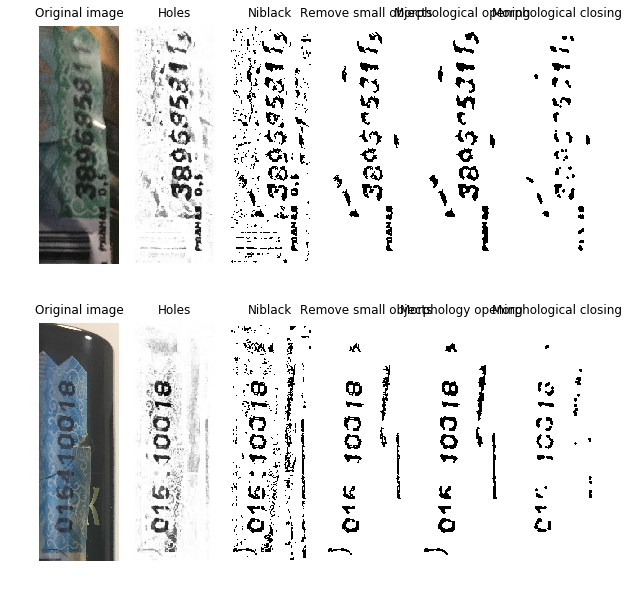

In [95]:
from skimage import measure
from skimage.filters import rank
from skimage.morphology import remove_small_objects, remove_small_holes, thin
from skimage.morphology import disk, diamond, square
from skimage.morphology import erosion, dilation, opening, closing, binary_opening, binary_closing

src = Image.open('data/premasked/IMG_0676.JPG')
src2 = Image.open('data/premasked/IMG_0549.JPG')
# src = Image.open('data/premasked/IMG_0560.JPG')
# src = Image.open('data/premasked/IMG_0562.JPG')
# src = Image.open('data/premasked/IMG_0595.JPG')

# First source
image = src.rotate(-90, expand=True).crop((1276, 78, 1276+392, 78+1166))
width = image.size[0]
height = image.size[1]

img = img_as_float(image)
logarithmic_corrected = adjust_log(img, 1)
img_log_clah = equalize_adapthist(logarithmic_corrected, clip_limit=0.03)
denoised = img_log_clah#denoise_tv_chambolle(img_log_clah, weight=0.1, multichannel=True)
denoised_g = rgb2gray(denoised)

seed = np.copy(denoised_g)
seed[1:-1, 1:-1] = denoised_g.max()
mask = denoised_g

filled = reconstruction(seed, mask, method='erosion')
# holes = denoise_tv_chambolle(denoised_g-filled, weight=0.1)
# holes = denoise_wavelet(denoised_g-filled)
holes = enhance_contrast(denoised_g-filled+1, disk(6))
# %time holes = denoise_tv_chambolle(enhance_contrast(denoised_g-filled+1, disk(8)), weight=0.1)
%time holes = denoise_wavelet(enhance_contrast(denoised_g-filled+1, disk(8)))
niblack = holes > threshold_niblack(holes, window_size=91, k=0.9)
contours = measure.find_contours(img_as_ubyte(holes), 0.8)

filtered = remove_small_holes(img_as_ubyte(niblack), 1000)

opened = binary_opening(filtered, disk(6))
closed = binary_closing(filtered, disk(6))

# Secong source
image2 = src2.rotate(-90, expand=True).crop((1276, 78, 1276+392, 78+1166))
width = image2.size[0]
height = image2.size[1]

img = img_as_float(image2)
logarithmic_corrected = adjust_log(img, 1)
img_log_clah = equalize_adapthist(logarithmic_corrected, clip_limit=0.03)
denoised = img_log_clah#denoise_tv_chambolle(img_log_clah, weight=0.1, multichannel=True)
denoised_g2 = rgb2gray(denoised)

seed = np.copy(denoised_g2)
seed[1:-1, 1:-1] = denoised_g2.max()
mask = denoised_g2

filled2 = reconstruction(seed, mask, method='erosion')
# holes2 = denoise_tv_chambolle(denoised_g2-filled2, weight=0.1)
# holes2 = denoise_tv_chambolle(enhance_contrast(denoised_g2-filled2+1, disk(8)), weight=0.1)
%time holes2 = denoise_wavelet(enhance_contrast(denoised_g2-filled2+1, disk(8)))
# holes2 = denoise_bilateral(img_as_ubyte(denoised_g2-filled2), sigma_color=0.1, sigma_spatial=15, multichannel=False)
niblack2 = holes2 > threshold_niblack(holes2, window_size=91, k=0.9)
contours2 = measure.find_contours(img_as_ubyte(holes2), 0.8)

filtered2 = remove_small_holes(img_as_ubyte(niblack2), 1000)

opened2 = binary_opening(filtered2, disk(6))
closed2 = binary_closing(filtered2, disk(6))

fig, ax = plt.subplots(2, 6, figsize=(10, 10), sharex=True, sharey=True)
ax = ax.ravel()

ax[0].imshow(image)
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(holes, cmap='gray')
ax[1].set_title('Holes')
ax[1].axis('off')

#ax[2].imshow(holes, interpolation='nearest', cmap='gray')
#for n, contour in enumerate(contours):
#    ax[2].plot(contour[:, 1], contour[:, 0], linewidth=2)
#ax[2].set_title('Contours')
#ax[2].axis('off')

ax[2].imshow(niblack, cmap='gray')
ax[2].set_title('Niblack')
ax[2].axis('off')

ax[3].imshow(filtered, cmap='gray')
ax[3].set_title('Remove small objects')
ax[3].axis('off')

ax[4].imshow(opened, cmap='gray')
ax[4].set_title('Morphological opening')
ax[4].axis('off')

ax[5].imshow(closed, cmap='gray')
ax[5].set_title('Morphological closing')
ax[5].axis('off')

ax[6].imshow(image2)
ax[6].set_title('Original image')
ax[6].axis('off')

ax[7].imshow(holes2, cmap='gray')
ax[7].set_title('Holes')
ax[7].axis('off')

#ax[8].imshow(holes2, interpolation='nearest', cmap='gray')
#for n, contour in enumerate(contours2):
#    ax[8].plot(contour[:, 1], contour[:, 0], linewidth=2)
#ax[8].set_title('Contours')
#ax[8].axis('off')

ax[8].imshow(niblack2, cmap='gray')
ax[8].set_title('Niblack')
ax[8].axis('off')

ax[9].imshow(filtered2, cmap='gray')
ax[9].set_title('Remove small objects')
ax[9].axis('off')

ax[10].imshow(opened2, cmap='gray')
ax[10].set_title('Morphology opening')
ax[10].axis('off')

ax[11].imshow(closed2, cmap='gray')
ax[11].set_title('Morphological closing')
ax[11].axis('off')

plt.show()